In [1]:
library(ggplot2)
library(rjags)
options(repr.plot.width=3, repr.plot.height=3)

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [8]:
runModel <- function(N.observed,r.observed,n.iter=1000) {
  jags.data <- list(N.observed=N.observed,r.observed=r.observed,eta=1)
  m <- jags.model("models/linking-model-jags4.0.bug",data=jags.data,inits=list(.RNG.name="base::Wichmann-Hill",.RNG.seed=1))
  update(m,10000)
  coda.res <- coda.samples(m,c("mu","nu","eta"),n.iter=n.iter)
  head(coda.res)
  #plot(coda.res)
  nu.posterior <- data.frame(nu=as.numeric(coda.res[[1]][,"nu"]))
  print(mean(nu.posterior$nu > 0.1))
  result.graph <- ggplot(nu.posterior,aes(nu)) + geom_density() + geom_rug() + scale_x_continuous(limits=c(0,10)
    ) + xlab(expression(nu)) + ylab(expression(paste("P(",nu,"|","data)"))) + theme_bw()
  return(list(nu.posterior=nu.posterior,graph=result.graph))
}

# Prior

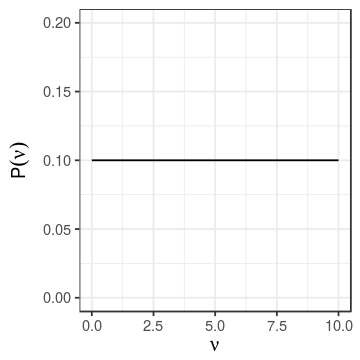

In [3]:
prior.df <- data.frame(x=c(0,10),y=c(0.1,0.1))
ggplot(prior.df,aes(x=x,y=y)) + geom_line() + scale_y_continuous(limits=c(0,0.2)) + xlab(expression(nu)) + ylab(expression(P(nu))) + theme_bw()
#ggsave("nu-prior.pdf",height=3,width=3)

In [6]:
N.observed <- matrix(c(10,10,100,100),2,2)

# Learners

### Overregularizer

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3
   Unobserved stochastic nodes: 4
   Total graph size: 27

Initializing model

[1] 0.995


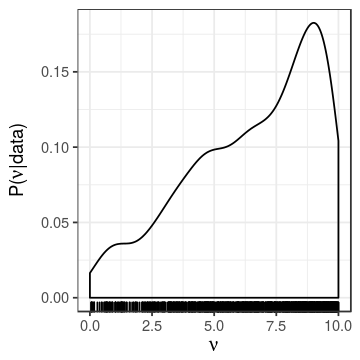

In [9]:
r.observed <- matrix(c(2,8,50,50),2,2)
print(runModel(N.observed,r.observed)$graph)
#ggsave("posterior-nu-overregularizer.pdf",height=3,width=3)


### Efficient Learner

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3
   Unobserved stochastic nodes: 4
   Total graph size: 27

Initializing model

[1] 0.984


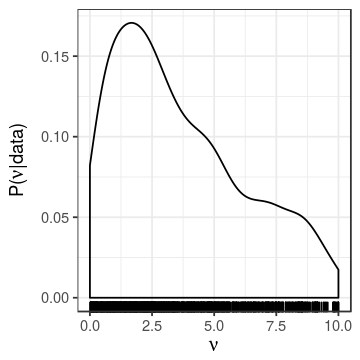

In [13]:
r.observed <- matrix(c(2,8,20,80),2,2)
print(runModel(N.observed,r.observed)$graph)
#ggsave("posterior-nu-efficient-learner.pdf",height=3,width=3)

### Island Learner

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3
   Unobserved stochastic nodes: 4
   Total graph size: 27

Initializing model

[1] 0.788


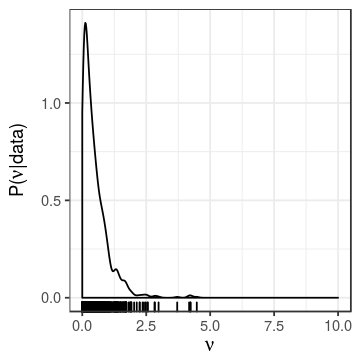

In [15]:
r.observed <- matrix(c(2,8,0,100),2,2)
print(runModel(N.observed,r.observed)$graph)
#ggsave("posterior-nu-island-learner.pdf",height=3,width=3)

### Vanilla Generalizer

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3
   Unobserved stochastic nodes: 4
   Total graph size: 27

Initializing model

[1] 0.996


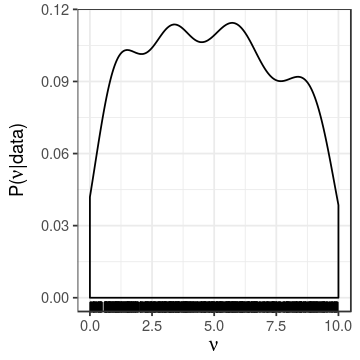

In [18]:
r.observed <- matrix(c(2,8,30,70),2,2)
print(runModel(N.observed,r.observed)$graph)
#ggsave("posterior-nu-vanilla-generalizer.pdf",height=3,width=3)

# Wug Test

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 19

Initializing model

[1] 1


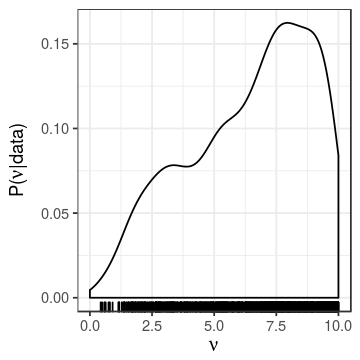

In [20]:
N.observed <- matrix(c(10,1),1,2)
r.observed <- matrix(c(0,1),1,2)
print(runModel(N.observed,r.observed)$graph)
#ggsave("posterior-nu-wug-test.pdf",height=3,width=3)